# Performance Testing Results with Microbenchmark 

## Purpose

Benchmarking for small bits of code can be compared using microbenchmark, leveraging code I've written to compare performance results implementing vectorization and memoisation. The resulting graph shows the ...

## Load Packages

In [ ]:
library(memoise)
library(microbenchmark)
library(ggplot2)

## Create Functions

In [ ]:
# base function
monte_carlo = function(N) {
    hits = 0
    for (i in seq_len(N)) {
        u1 = runif(1)
        u2 = runif(1)
        if (u1 ^ 2 > u2)
            hits = hits + 1
        }
    return(hits / N)
}

# memoise test function 
monte_carlo_memo <- memoise(monte_carlo)

# vectorize function
monte_carlo_vec <- function(N) mean(runif(N) ^ 2 > runif(N))

# memoise vectorized function
monte_carlo_vec_memo <- memoise(monte_carlo_vec)

## Run Test

In [ ]:
n <- 999999
comparison <- microbenchmark(times = 10
                             , memoised = system.time(monte_carlo_memo(n))
                             , vectorised = system.time(monte_carlo_vec(n))
                             , both = system.time(monte_carlo_vec_memo(n)))

## Results

In [ ]:
Unit: milliseconds
       expr        min            lq         mean        median        uq            max        neval
   memoised       45.88         51.55      109.45        57.93       63.04         5027.95        100
 vectorised      176.18        226.01      235.94        236.47      248.78         332.85        100
       both       46.23         50.67       59.60        54.74       62.86          224.50        100

## Display

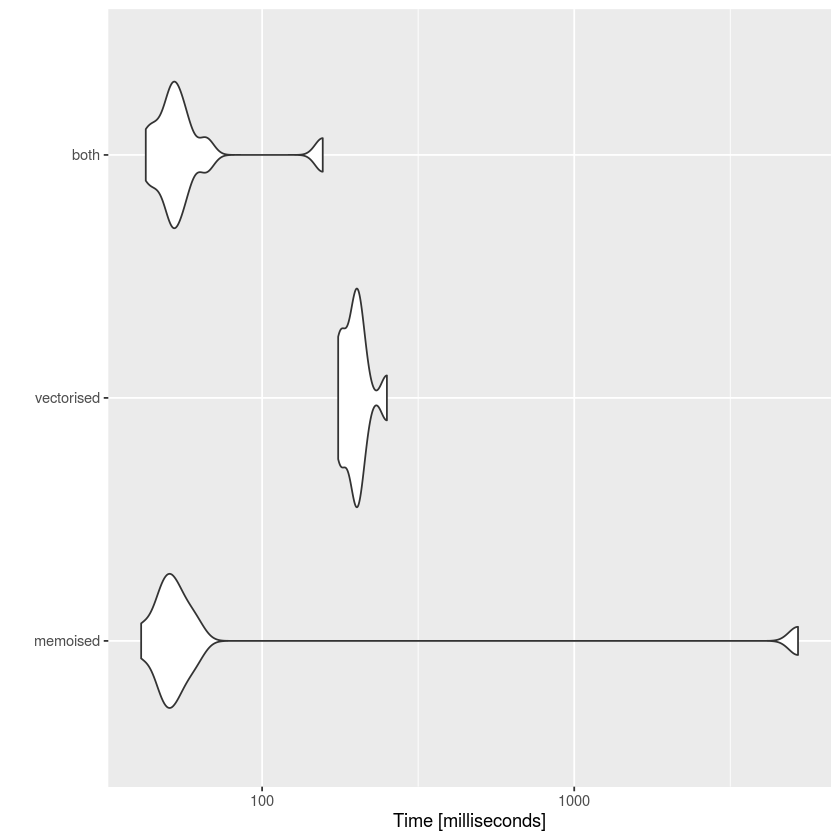

In [ ]:
autoplot(comparison)